# Assignment: week 1

## Objectives

The objectives of this assignment are:
1.	to learn to build and train a simple neural network with Keras
2.	to learn to follow and interpret the progress of training

First we import all the necessary libraries. We will use keras Sequential and Dense for building the model, and to_categorical for modifying the data.

We also import numpy, pandas and matplotlib for dataframe usage and plotting the results.

In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Next we will download the iris dataset from the url.

In [3]:
# Download the iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, names=col_names)

# Display the first few rows to verify
display(iris_df.head())

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In the next phase we will modify the data to be used with training the model. We will one-hot encode the target variable to make it into separate binary columns. We will combine these into a dataset and shuffle the rows randomly.

In [4]:
# One-hot encode the target variable
iris_df['class'] = iris_df['class'].astype('category')
iris_df['class'] = iris_df['class'].cat.codes
target = to_categorical(iris_df['class'])

# Separate features
features = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# Combine features and encoded target for shuffling
data = np.concatenate((features, target), axis=1)

# Shuffle the data
np.random.shuffle(data)

# Separate features and target again after shuffling
shuffled_features = data[:, :4]
shuffled_target = data[:, 4:]

# Display the shape of the shuffled data to verify
print("Shape of shuffled features:", shuffled_features.shape)
print("Shape of shuffled target:", shuffled_target.shape)

Shape of shuffled features: (150, 4)
Shape of shuffled target: (150, 3)


Now we will build and train the model. I used a Dense layer with 10 units and Relu activation, and for the output there are 3 units for the 3 possible classes and softmax activation.

After that I complie the model using adam optimizer with chosen learning rate of 0.0007. I chose this after testing with several different values, and this got me the best values.

The model is trained with validation split of 20%, and run in 100 epochs.

I will also plot the final results for each epoch.

Epoch 1/100


C:\Users\OMISTAJA\anaconda3\envs\neurojoku\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.3250 - loss: 1.7561 - val_accuracy: 0.3667 - val_loss: 1.7238
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3250 - loss: 1.6620 - val_accuracy: 0.3667 - val_loss: 1.6282
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3250 - loss: 1.5730 - val_accuracy: 0.3667 - val_loss: 1.5375
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3250 - loss: 1.4832 - val_accuracy: 0.3667 - val_loss: 1.4548
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3250 - loss: 1.4082 - val_accuracy: 0.3667 - val_loss: 1.3726
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3250 - loss: 1.3311 - val_accuracy: 0.3667 - val_loss: 1.3003
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3250 - loss: 1.2622 - val_accuracy: 0.3667 - val_loss: 1.2333
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3250 - loss: 1.1999 - val_accuracy: 0.3667 - val_l

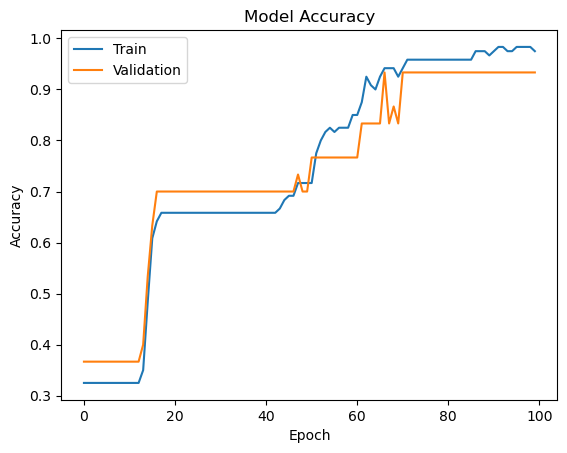

In [5]:
# Build the neural network model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Create optimizer and compile the model
opt = keras.optimizers.Adam(learning_rate=0.0007)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model with validation split
history = model.fit(shuffled_features, shuffled_target, epochs=100, batch_size=10, validation_split=0.2)

# Print final training and validation accuracy from history
print(f"Final Training Accuracy (from history): {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy (from history): {history.history['val_accuracy'][-1]:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


We can see that the final training accuracy for the model is 0.9667, and the final validation accuracy for the model is also 0.9667.